<a href="https://colab.research.google.com/github/EdsonMH14/Analisis-de-datos/blob/main/Analisis_exploratorio_anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cargar el archivo CSV
df= pd.read_csv('100_animes_mas_vistos_en_el_mundo.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,NaN
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0
2,NaN,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0
3,Bleach,Brazil,6.4,NaN,Ufotable,45.35,2002.0,Fantasy,55.0
4,Sword Art Online,NaN,9.8,327.0,Madhouse,15.90,2017.0,NaN,43.0


In [ ]:
# Muestra las últimas 5 filas del DataFrame
df.tail()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
95,Tokyo Ghoul,Philippines,6.5,499.0,NaN,40.62,NaN,Psychological,51.0
96,Attack on Titan,Brazil,8.8,248.0,Pierrot,54.69,1993.0,Sci-Fi,57.0
97,NaN,Argentina,8.2,384.0,Madhouse,39.73,2014.0,NaN,52.0
98,Jujutsu Kaisen,India,7.2,396.0,Pierrot,68.53,1992.0,Sci-Fi,42.0
99,My Hero Academia,Thailand,7.7,283.0,Studio Ghibli,5.82,2021.0,Fantasy,34.0


In [ ]:
# La salida es de la forma (filas, columnas) del data frame.
df.shape

(100, 9)

In [ ]:
# Es un método que muestra un resumen conciso del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Anime Name                      90 non-null     object 
 1   Most Watched in Country         90 non-null     object 
 2   Ratings                         90 non-null     float64
 3   Number of Episodes              90 non-null     float64
 4   Animation Studio Name           90 non-null     object 
 5   Budget (in Million USD)         90 non-null     float64
 6   Release Year                    90 non-null     float64
 7   Genre                           90 non-null     object 
 8   Duration per Episode (minutes)  90 non-null     float64
dtypes: float64(5), object(4)
memory usage: 7.2+ KB


In [ ]:
# Método que calcula estadísticas descriptivas para las columnas numéricas del DataFrame
#count: Número de valores no nulos.
#mean: Media (promedio) de los valores.
#std: Desviación estándar (medida de dispersión).
#min: Valor mínimo.
#25%: Primer cuartil (25% de los datos están por debajo de este valor).
#50%: Mediana (50% de los datos están por debajo de este valor).
#75%: Tercer cuartil (75% de los datos están por debajo de este valor).
#max: Valor máximo.
df.describe()

,Ratings,Number of Episodes,Budget (in Million USD),Release Year,Duration per Episode (minutes)
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,8.222222,250.722222,74.260778,2005.133333,39.888889
std,1.114035,138.047462,43.209005,9.967588,12.466084
min,6.200000,12.000000,5.820000,1990.000000,20.000000
25%,7.200000,131.500000,38.220000,1995.500000,29.250000
50%,8.200000,275.000000,67.270000,2005.500000,39.000000
75%,9.350000,360.000000,110.827500,2014.000000,52.000000
max,10.000000,499.000000,149.390000,2022.000000,59.000000


In [ ]:
# Cuenta los valores nulos en cada columna del DataFrame
df.isnull().sum()

,0
Anime Name,10
Most Watched in Country,10
Ratings,10
Number of Episodes,10
Animation Studio Name,10
Budget (in Million USD),10
Release Year,10
Genre,10
Duration per Episode (minutes),10


In [ ]:
#LIMPIEZA DE LOS DATOS FALTANTES
# Rellena los valores nulos en la columna Number of Episodes con la mediana de esa columna
df['Number of Episodes'].fillna(df['Number of Episodes'].median(), inplace=True)

# Rellena los valores nulos en la columna Duration per Episode (minutes) con la mediana de esa columna.
df['Duration per Episode (minutes)'].fillna(df['Duration per Episode (minutes)'].median(), inplace=True)

# Rellena los valores nulos en la columna Anime Name con el texto 'Unknown'
df['Anime Name'].fillna('Unknown', inplace=True)

# Rellena los valores nulos en la columna Genre con el texto 'Unknown'
df['Genre'].fillna('Unknown', inplace=True)

# Rellena los valores nulos en la columna Most Watched in Country con el texto 'Unknown'
df['Most Watched in Country'].fillna('Unknown', inplace=True)

# Rellena los valores nulos en la columna Budget (in Million USD) con el promedio de esa columna
df['Budget (in Million USD)'].fillna(df['Budget (in Million USD)'].mean(), inplace=True)

# Rellena los valores nulos en la columna Rating con la mediana de esa columna
df['Ratings'].fillna(df['Ratings'].median(), inplace=True)

# Rellena los valores nulos en la columna Animation Studio Name con el texto 'Unknown'
df['Animation Studio Name'].fillna('Unknown', inplace=True)

# Rellena los valores nulos en la columna Release Year con la mediana de esa columna
df['Release Year'].fillna(df['Release Year'].median(), inplace=True)

In [ ]:
# Mostrar las primeras filas del DataFrame
df.head()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
0,Fullmetal Alchemist,Brazil,8.8,317.0,Ufotable,80.61,1998.0,Fantasy,39.0
1,Haikyuu!!,Mexico,9.2,420.0,MAPPA,74.99,2022.0,Adventure,59.0
2,Unknown,South Korea,7.4,419.0,A-1 Pictures,59.05,2009.0,Mystery,56.0
3,Bleach,Brazil,6.4,275.0,Ufotable,45.35,2002.0,Fantasy,55.0
4,Sword Art Online,Unknown,9.8,327.0,Madhouse,15.90,2017.0,Unknown,43.0


In [ ]:
df.tail()

,Anime Name,Most Watched in Country,Ratings,Number of Episodes,Animation Studio Name,Budget (in Million USD),Release Year,Genre,Duration per Episode (minutes)
95,Tokyo Ghoul,Philippines,6.5,499.0,Unknown,40.62,2005.5,Psychological,51.0
96,Attack on Titan,Brazil,8.8,248.0,Pierrot,54.69,1993.0,Sci-Fi,57.0
97,Unknown,Argentina,8.2,384.0,Madhouse,39.73,2014.0,Unknown,52.0
98,Jujutsu Kaisen,India,7.2,396.0,Pierrot,68.53,1992.0,Sci-Fi,42.0
99,My Hero Academia,Thailand,7.7,283.0,Studio Ghibli,5.82,2021.0,Fantasy,34.0


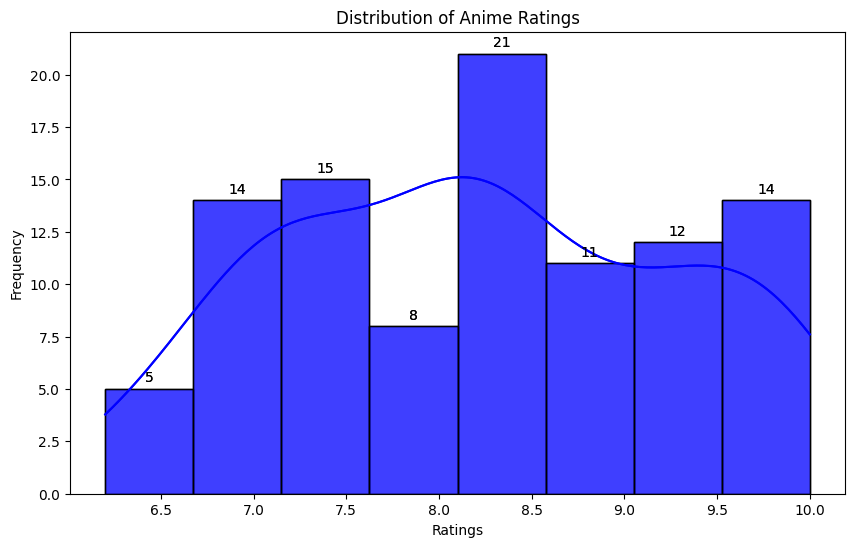

In [ ]:
# Prepara un lienzo de tamaño personalizado para la visualización.
plt.figure(figsize=(10, 6))

# Crea un histograma de la columna Ratings con una curva de densidad superpuesta.
sns.histplot(df['Ratings'], kde=True, color='blue')

# Guardamos el objeto del gráfico en la variable ax. Esto nos permite acceder a las propiedades del gráfico, como las barras (patches).
ax = sns.histplot(df['Ratings'], kde=True, color='blue')

# Añadir los valores de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra (frecuencia)
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posición X: centro de la barra
        height + 0.2,                     # Posición Y: altura de la barra + un pequeño offset
        f'{int(height)}',                  # Texto: valor de la frecuencia
        ha='center',                       # Alineación horizontal: centrada
        va='bottom'                        # Alineación vertical: en la parte inferior del texto
    )

# Añade un título descriptivo al gráfico.
plt.title('Distribution of Anime Ratings')

# Describe el eje X como "Ratings"
plt.xlabel('Ratings')

# Describe el eje Y como "Frequency" (frecuencia)
plt.ylabel('Frequency')

# Renderiza y muestra el gráfico en pantalla.
plt.show()

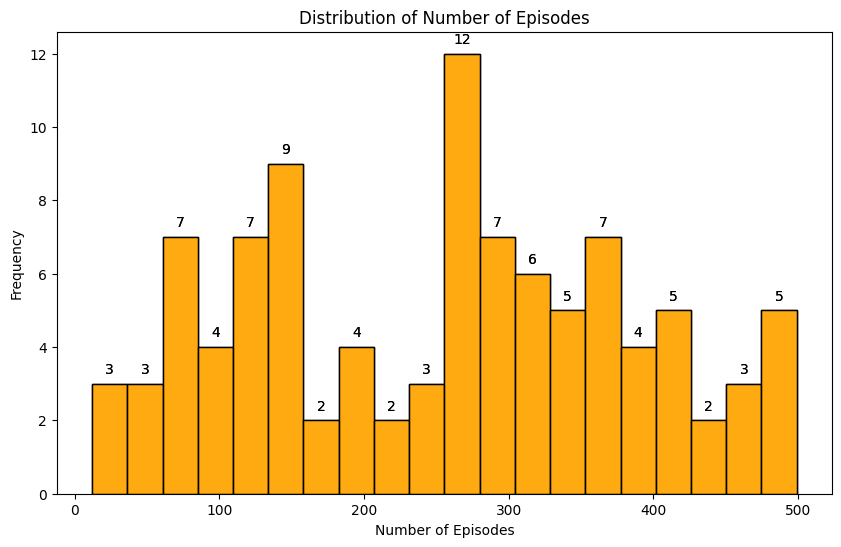

In [ ]:
# Prepara un lienzo de tamaño personalizado para la visualización.
plt.figure(figsize=(10, 6))

# Crea un histograma de la columna Number of Episodes con 20 barras y color verde.
sns.histplot(df['Number of Episodes'], bins=20, color='orange')

# Guardamos el objeto del gráfico en la variable ax. Esto nos permite acceder a las propiedades del gráfico, como las barras (patches).
ax = sns.histplot(df['Number of Episodes'], bins = 20, color='orange')

# Añadir los valores de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra (frecuencia)
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posición X: centro de la barra
        height + 0.2,                     # Posición Y: altura de la barra + un pequeño offset
        f'{int(height)}',                  # Texto: valor de la frecuencia
        ha='center',                       # Alineación horizontal: centrada
        va='bottom'                        # Alineación vertical: en la parte inferior del texto
    )

plt.title('Distribution of Number of Episodes')

plt.xlabel('Number of Episodes')

plt.ylabel('Frequency')

plt.show()

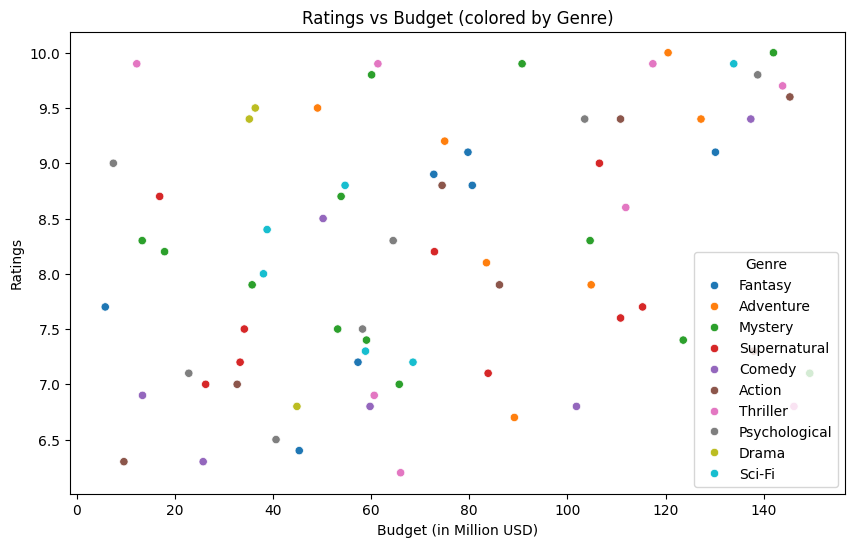

In [ ]:
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión que muestra la relación entre el presupuesto (Budget) y las calificaciones (Ratings),
# coloreando los puntos según el género (Genre).
sns.scatterplot(x='Budget (in Million USD)', y='Ratings', data=df, hue='Genre')

plt.title('Ratings vs Budget (colored by Genre)')
plt.xlabel('Budget (in Million USD)')
plt.ylabel('Ratings')
plt.show()

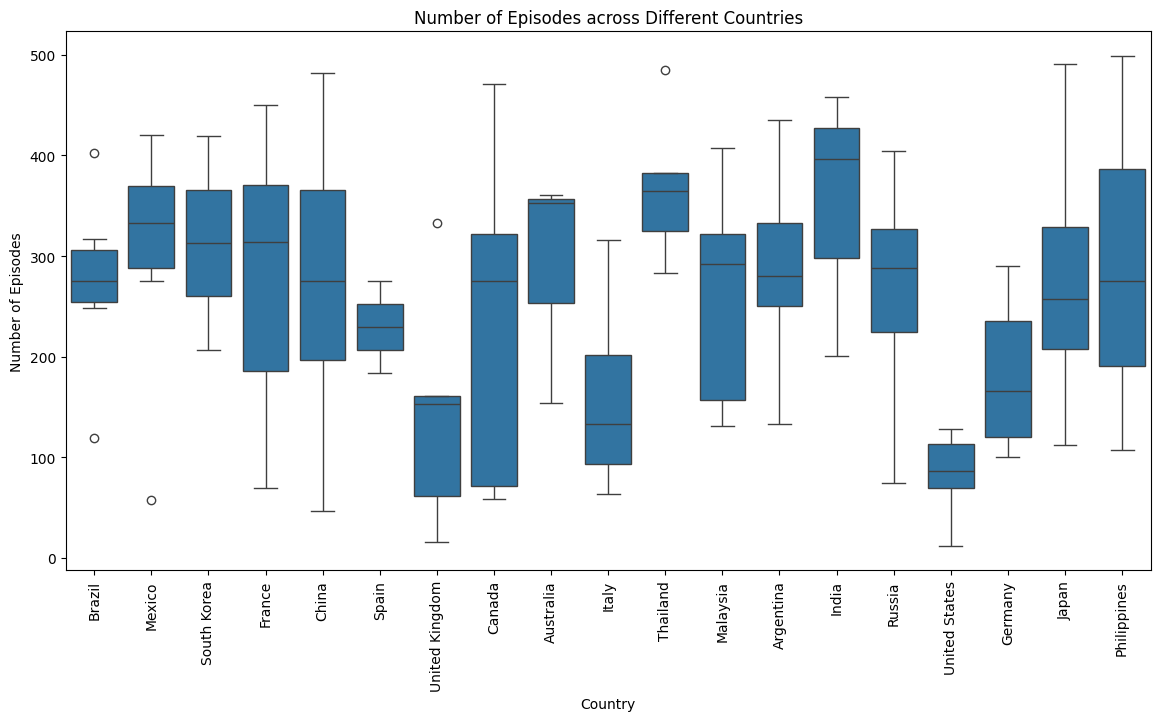

In [ ]:
plt.figure(figsize=(14, 7))

# Crea un gráfico de caja que muestra la distribución del número de episodios (Number of Episodes) para cada país (Most Watched in Country).
sns.boxplot(x='Most Watched in Country', y='Number of Episodes', data=df)

# Mejora la legibilidad de las etiquetas del eje X, especialmente si hay muchos países o los nombres son largos.
plt.xticks(rotation=90)

plt.title('Number of Episodes across Different Countries')
plt.xlabel('Country')
plt.ylabel('Number of Episodes')
plt.show()

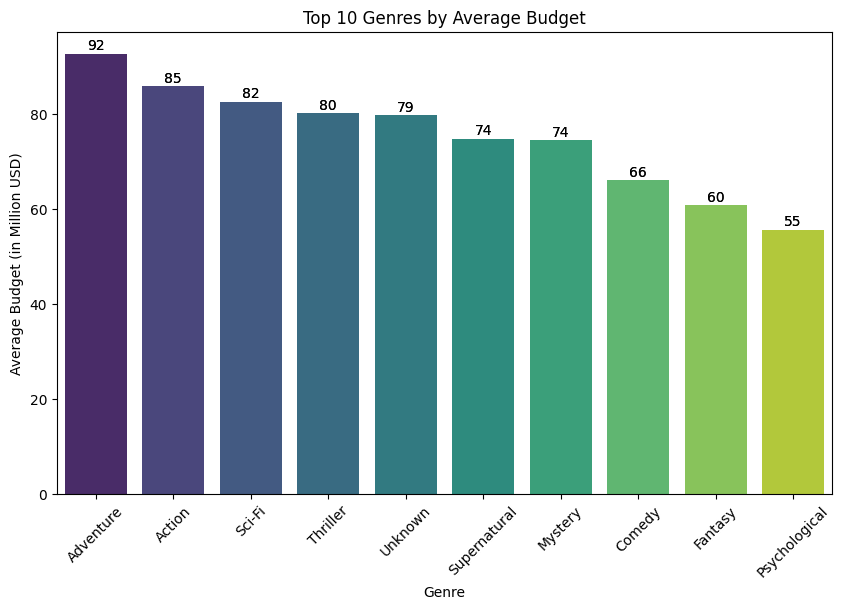

In [ ]:
plt.figure(figsize=(10, 6))

# Crea una serie (top_genres) con los 10 géneros que tienen el presupuesto promedio más alto.
top_genres = df.groupby('Genre')['Budget (in Million USD)'].mean().sort_values(ascending=False).head(10)

# Crea un gráfico de barras que muestra los 10 géneros con el presupuesto promedio más alto.
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')

# Guardamos el objeto del gráfico en la variable ax. Esto nos permite acceder a las propiedades del gráfico, como las barras (patches).
ax = sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')

# Añadir los valores de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra (frecuencia)
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posición X: centro de la barra
        height + 0.2,                     # Posición Y: altura de la barra + un pequeño offset
        f'{int(height)}',                  # Texto: valor de la frecuencia
        ha='center',                       # Alineación horizontal: centrada
        va='bottom'                        # Alineación vertical: en la parte inferior del texto
    )

plt.title('Top 10 Genres by Average Budget')
plt.xlabel('Genre')
plt.ylabel('Average Budget (in Million USD)')
plt.xticks(rotation=45)
plt.show()

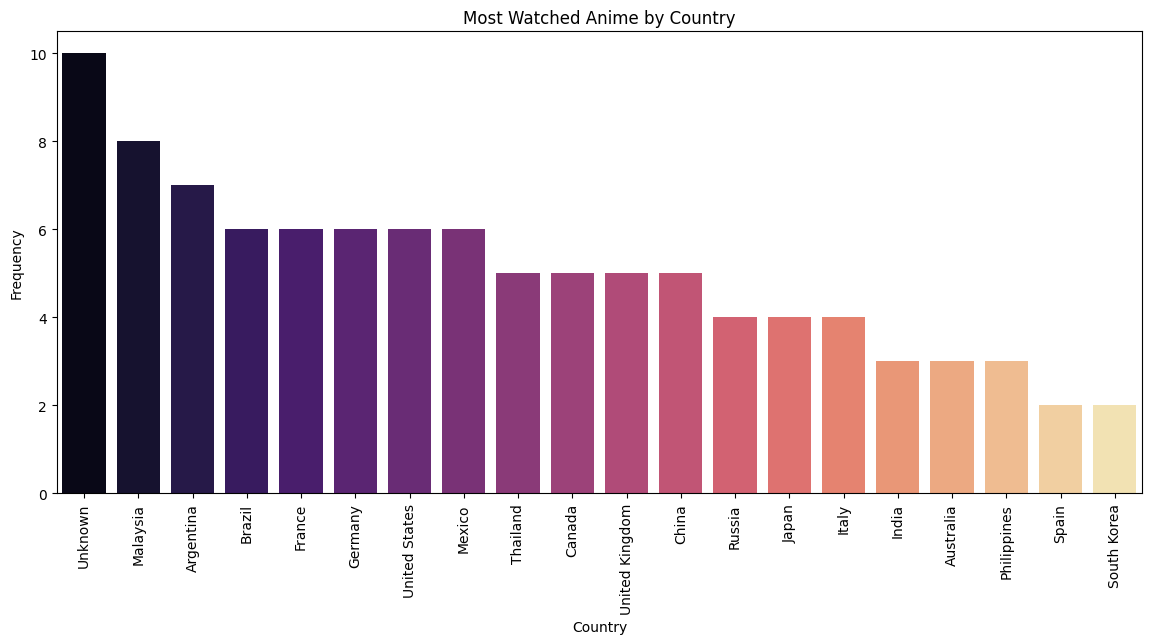

In [ ]:
plt.figure(figsize=(14, 6))

# Crea una serie (top_anime_country) con los países y su frecuencia, ordenada de menor a mayor.
top_anime_country = df['Most Watched in Country'].value_counts().sort_values(ascending=False)

# Crea un gráfico de barras que muestra la frecuencia de los países donde más se ve anime.
sns.barplot(x=top_anime_country.index, y=top_anime_country.values, palette='magma')

plt.title('Most Watched Anime by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

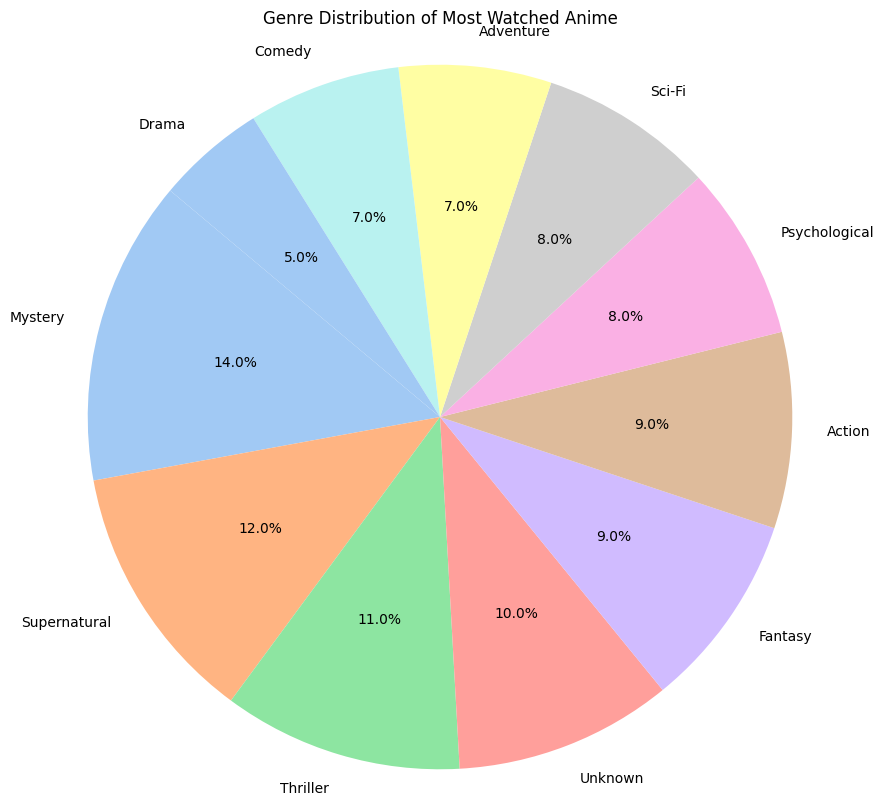

In [ ]:
plt.figure(figsize=(10, 10))

# Crea una serie (genre_counts) con los géneros y su frecuencia.
genre_counts = df['Genre'].value_counts()

# Crea un gráfico de pastel que muestra la distribución de los géneros de los animes más vistos.
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Genre Distribution of Most Watched Anime')

# Asegura que el gráfico de pastel se dibuje como un círculo perfecto (con igual proporción en los ejes X e Y).
plt.axis('equal')

plt.show()

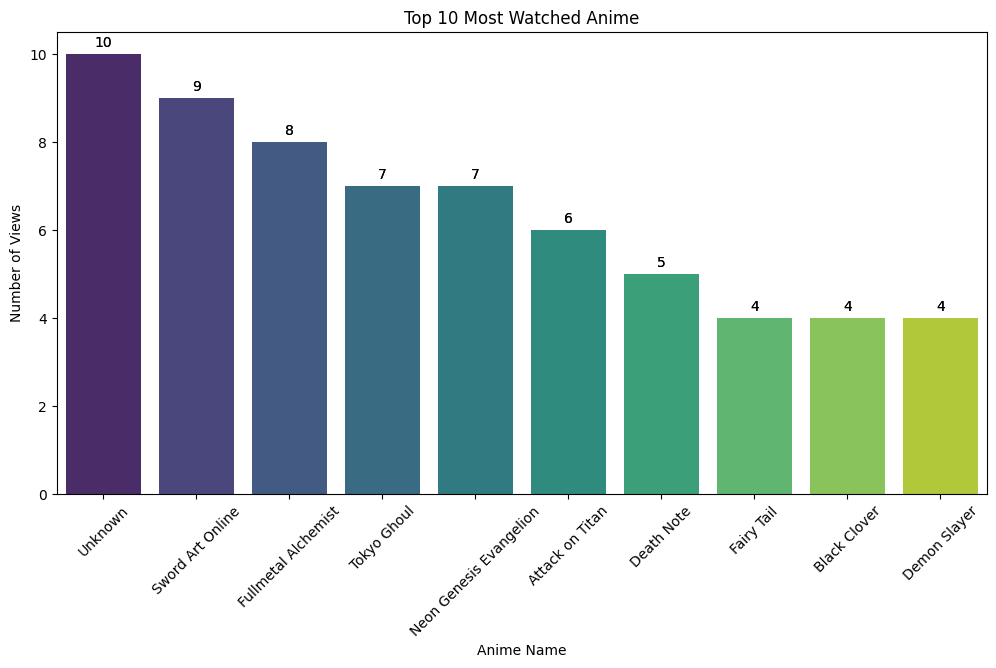

In [ ]:
# Contar la frecuencia de cada anime
anime_counts = df['Anime Name'].value_counts()

# Seleccionar los 10 animes más vistos (puedes ajustar el número)
top_anime = anime_counts.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_anime.index, y=top_anime.values, palette='viridis')

# Guardamos el objeto del gráfico en la variable ax. Esto nos permite acceder a las propiedades del gráfico, como las barras (patches).
ax = sns.barplot(x=top_anime.index, y=top_anime.values, palette='viridis')

# Añadir los valores de cada barra
for p in ax.patches:
    height = p.get_height()  # Altura de la barra (frecuencia)
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posición X: centro de la barra
        height + 0.1,                     # Posición Y: altura de la barra + un pequeño offset
        f'{int(height)}',                  # Texto: valor de la frecuencia
        ha='center',                       # Alineación horizontal: centrada
        va='bottom'                        # Alineación vertical: en la parte inferior del texto
    )

# Personalizar el gráfico
plt.title('Top 10 Most Watched Anime')
plt.xlabel('Anime Name')
plt.ylabel('Number of Views')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

In [ ]:
#Para guardar el archivo .csv
df.to_csv('100_animes_mas_vistos_en_el_mundo.csv', index=False)  # index=False evita que se guarde la columna de índices

# Descargar el archivo a tu computadora
files.download('100_animes_mas_vistos_en_el_mundo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>